In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D,UpSampling2D,Convolution2D,Input
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,_),(X_test,_) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)
X_train = X_train/255.0
X_test = X_test/255.0

X_train = np.reshape(X_train,(len(X_train),28,28,1))
X_test = np.reshape(X_test,(len(X_test),28,28,1))

In [3]:
input = Input(shape=(28,28,1),name = 'input')
x = Convolution2D(16,kernel_size=(3,3),padding='same',activation='relu',name='conv_1')(input)
x = MaxPooling2D(pool_size=(2,2),padding='same')(x)
x = Convolution2D(8,kernel_size=(3,3),padding='same',activation='relu',name='conv_2')(x)
x = MaxPooling2D(pool_size=(2,2),padding='same')(x)
x = Convolution2D(8,kernel_size=(3,3),padding='same',activation='relu',name='conv_3')(x)
x = MaxPooling2D(pool_size=(2,2),padding='same')(x)


x = Convolution2D(8,kernel_size=(3,3),padding='same',activation='relu',name='conv_4')(x)
x = UpSampling2D(size=(2,2))(x)
x = Convolution2D(8,kernel_size=(3,3),padding='same',activation='relu',name='conv_5')(x)
x = UpSampling2D(size=(2,2))(x)
x = Convolution2D(8,kernel_size=(3,3),activation='relu',name='conv_6')(x)
x = UpSampling2D(size=(2,2))(x)

output = Convolution2D(filters=1,kernel_size=(3,3),padding='same',activation='sigmoid',name='output')(x)

model = Model(inputs=input,outputs=output,name='CAE') 



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
model.compile(optimizer='Adam',loss='binary_crossentropy')
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "CAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 7, 7, 8)           584       
___________________________________

In [5]:
model.fit(X_train,X_train,batch_size=256, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.2977
Epoch 2/10
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1625
Epoch 3/10
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1433
Epoch 4/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.1337
Epoch 5/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.1276
Epoch 6/10
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1234
Epoch 7/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.1205
Epoch 8/10
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1183
Epoch 9/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.1167
Epoch 10/10
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1151


In [7]:
out_images = model.predict(X_test)

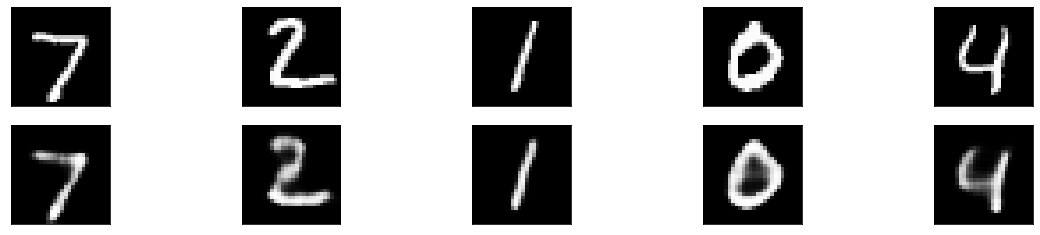

In [9]:
import matplotlib.pyplot as plt

n = 5

plt.figure(figsize=(20,4))
for i in range(n):
    
    ax=plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(out_images[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()